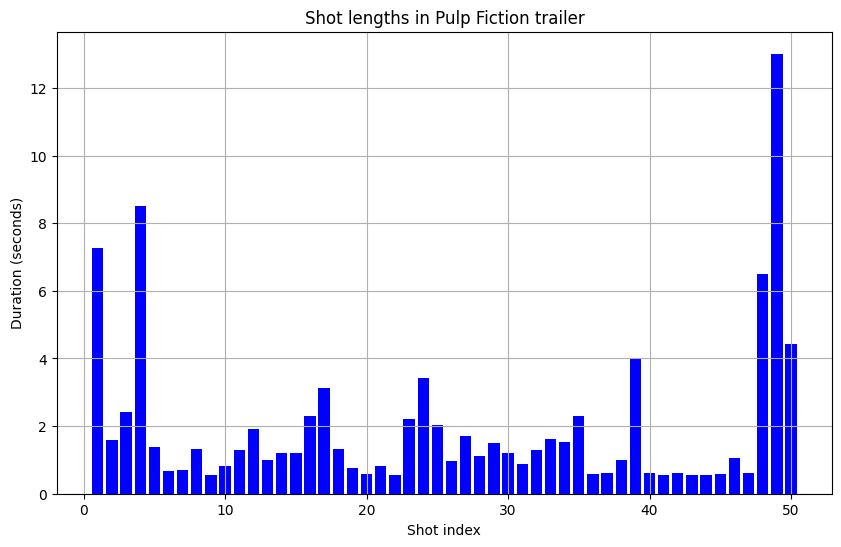

In [ ]:
import matplotlib.pyplot as plt
from scenedetect import detect, AdaptiveDetector, split_video_ffmpeg
import cv2

# Detect scenes
scene_list = detect('media/pulpfiction_trailer.mp4', AdaptiveDetector())

# List to store the scene durations
scene_durations = []

# Loop through each scene and calculate the length
for i, scene in enumerate(scene_list):
    start_timecode, end_timecode = scene
    # Get the start and end frames from the timecode objects
    start_frame = start_timecode.get_frames()
    end_frame = end_timecode.get_frames()

    # Get video FPS (frames per second) to convert frames to time
    video = cv2.VideoCapture('media/pulpfiction_trailer.mp4')
    fps = video.get(cv2.CAP_PROP_FPS)
    video.release()
    
    # Calculate the duration of the scene in seconds
    duration = (end_frame - start_frame) / fps
    scene_durations.append(duration)

average_duration = sum(scene_durations) / len(scene_durations)
print(f"Average scene duration: {average_duration:.2f} seconds")    

# Plotting the scene durations as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(scene_durations) + 1), scene_durations, color='b')
plt.title('Shot lengths in Pulp Fiction trailer')
plt.xlabel('Shot index')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()
